# Linear Regression using Scikit-Learn

There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms that you will work with in this course.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.


### Load the data set

In [4]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

### Scale/normalize the training data

In [5]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


### Create and fit the regression model

In [6]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 112, number of weight updates: 11089.0


### View parameters
Note, the parameters are associated with the *normalized* input data. The fit parameters are very close to those found in the previous lab with this data.

In [7]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [109.9  -20.96 -32.35 -38.05], b:[363.13]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [8]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.21 485.75 389.58 491.9 ]
Target values 
[300.  509.8 394.  540. ]


### Plot Results
Let's plot the predictions versus the target values.

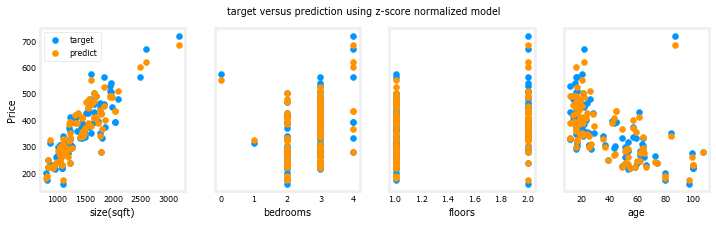

In [9]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

# Linear Regression, closed-form solution
Scikit-learn has the [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) which implements a closed-form linear regression.

Let's use the data from the early labs - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


### Load the data set

In [11]:
X_train = np.array([1.0, 2.0])   #features
y_train = np.array([300, 500])   #target value

### Create and fit the model
The code below performs regression using scikit-learn. 
The first step creates a regression object.  
The second step utilizes one of the methods associated with the object, `fit`. This performs regression, fitting the parameters to the input data. The toolkit expects a two-dimensional X matrix.

In [12]:
linear_model = LinearRegression()
#X must be a 2-D Matrix
linear_model.fit(X_train.reshape(-1, 1), y_train) 

LinearRegression()

### View Parameters 
The $\mathbf{w}$ and $\mathbf{b}$ parameters are referred to as 'coefficients' and 'intercept' in scikit-learn.

In [13]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")
print(f"'manual' prediction: f_wb = wx+b : {1200*w + b}")

w = [200.], b = 100.00
'manual' prediction: f_wb = wx+b : [240100.]


### Make Predictions

Calling the `predict` function generates predictions.

In [14]:
y_pred = linear_model.predict(X_train.reshape(-1, 1))

print("Prediction on training set:", y_pred)

X_test = np.array([[1200]])
print(f"Prediction for 1200 sqft house: ${linear_model.predict(X_test)[0]:0.2f}")

Prediction on training set: [300. 500.]
Prediction for 1200 sqft house: $240100.00


## Second Example
The second example is from an earlier lab with multiple features. The final parameter values and predictions are very close to the results from the un-normalized 'long-run' from that lab. That un-normalized run took hours to produce results, while this is nearly instantaneous. The closed-form solution work well on smaller data sets such as these but can be computationally demanding on larger data sets. 
>The closed-form solution does not require normalization.

In [15]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [17]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [  0.27 -32.62 -67.25  -1.47], b = 220.42


In [18]:
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")

x_house = np.array([1200, 3,1, 40]).reshape(-1,4)
x_house_predict = linear_model.predict(x_house)[0]
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.2f}")

Prediction on training set:
 [295.18 485.98 389.52 492.15]
prediction using w,b:
 [295.18 485.98 389.52 492.15]
Target values 
 [300.  509.8 394.  540. ]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709.09


# Logistic Regression using Scikit-Learn

## Dataset 
Let's start with the same dataset as before.

In [19]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

## Fit the model

The code below imports the [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) from scikit-learn. You can fit this model on the training data by calling `fit` function.

In [20]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

## Make Predictions

You can see the predictions made by this model by calling the `predict` function.

In [21]:
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


## Calculate accuracy

You can calculate this accuracy of this model by calling the `score` function.

In [22]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0
